## Charting 01

In [1]:
# install necessary modules
!pip install yfinance
!pip install mplfinance

In [22]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=7b1344d2e6b7b637faa30dd2c94a5323f63e30c24efcd82335232a59f22e9c68
  Stored in directory: /home/tikam/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

## Get Stock Price

In [3]:
# download stock price data
symbol = 'HSCL.NS'
df = yf.download(symbol, period='6mo')

[*********************100%%**********************]  1 of 1 completed


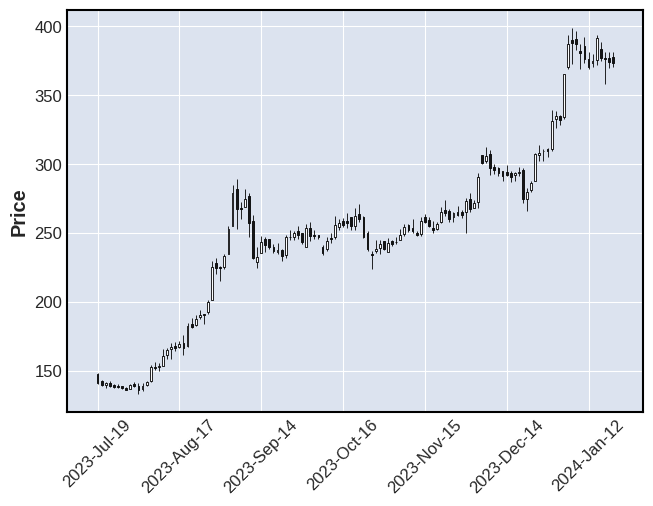

In [4]:
# plot candlestick chart
mpf.plot(df, type='candle')

## Add moving averages and volume

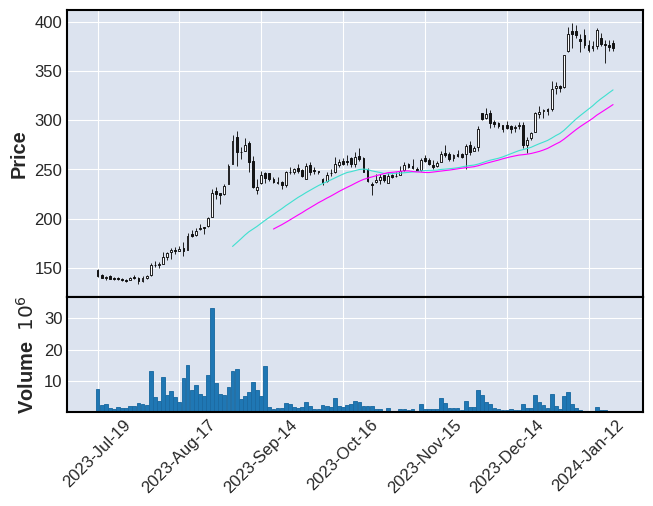

In [10]:
# Add moving averages and volume
mpf.plot(df, type='candle', mav=(34,44), volume=True)

##  Add MACD & stochastics as subplot

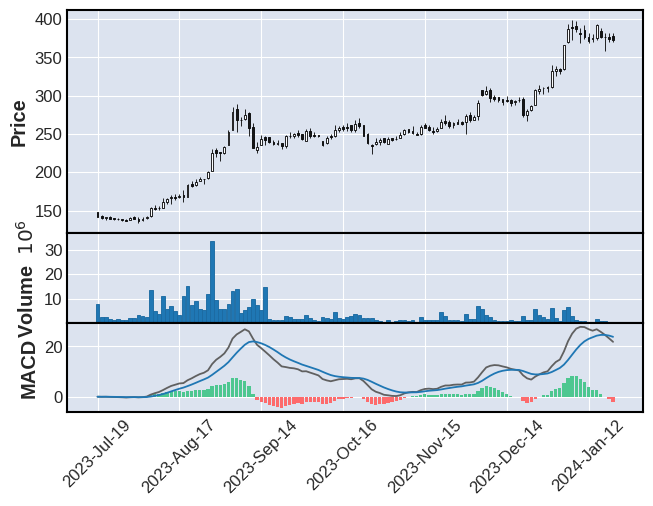

In [11]:
# Add MACD as subplot
def MACD(df, window_slow, window_fast, window_signal):
    macd = pd.DataFrame()
    macd['ema_slow'] = df['Close'].ewm(span=window_slow).mean()
    macd['ema_fast'] = df['Close'].ewm(span=window_fast).mean()
    macd['macd'] = macd['ema_slow'] - macd['ema_fast']
    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()
    macd['diff'] = macd['macd'] - macd['signal']
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)
    return macd

macd = MACD(df, 12, 26, 9)
macd_plot  = [
    mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
]

mpf.plot(df, type='candle', volume=True, addplot=macd_plot)

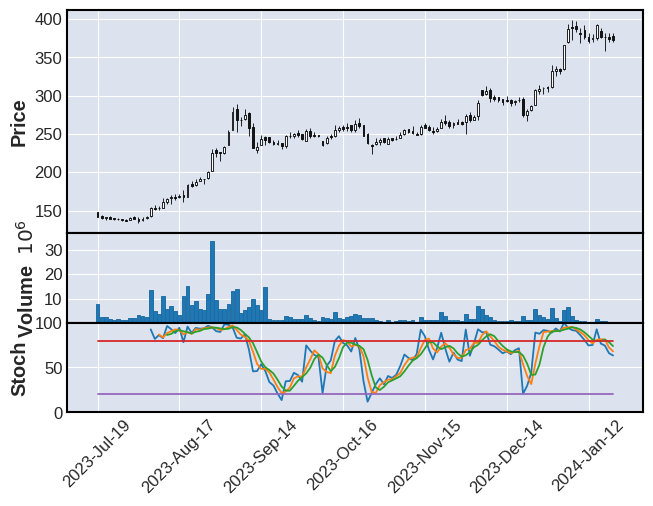

In [12]:
def Stochastic(df, window, smooth_window):
    stochastic = pd.DataFrame()
    stochastic['%K'] = ((df['Close'] - df['Low'].rolling(window).min()) \
                        / (df['High'].rolling(window).max() - df['Low'].rolling(window).min())) * 100
    stochastic['%D'] = stochastic['%K'].rolling(smooth_window).mean()
    stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
    stochastic['UL'] = 80
    stochastic['DL'] = 20
    return stochastic

stochastic = Stochastic(df, 14, 3)
stochastic_plot  = [
    mpf.make_addplot((stochastic[['%K', '%D', '%SD', 'UL', 'DL']]), ylim=[0, 100], panel=2, ylabel='Stoch')
]

mpf.plot(df, type='candle', volume=True, addplot=stochastic_plot)

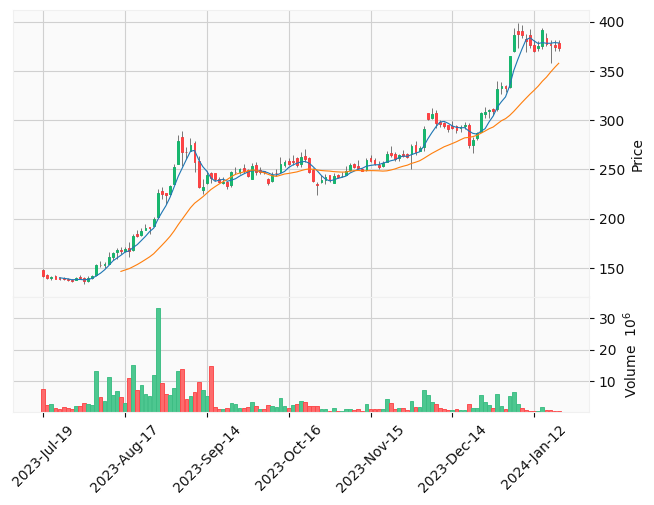

In [13]:
# Customization: style
mpf.plot(df, style='yahoo', type='candle', mav=(5,20), volume=True)

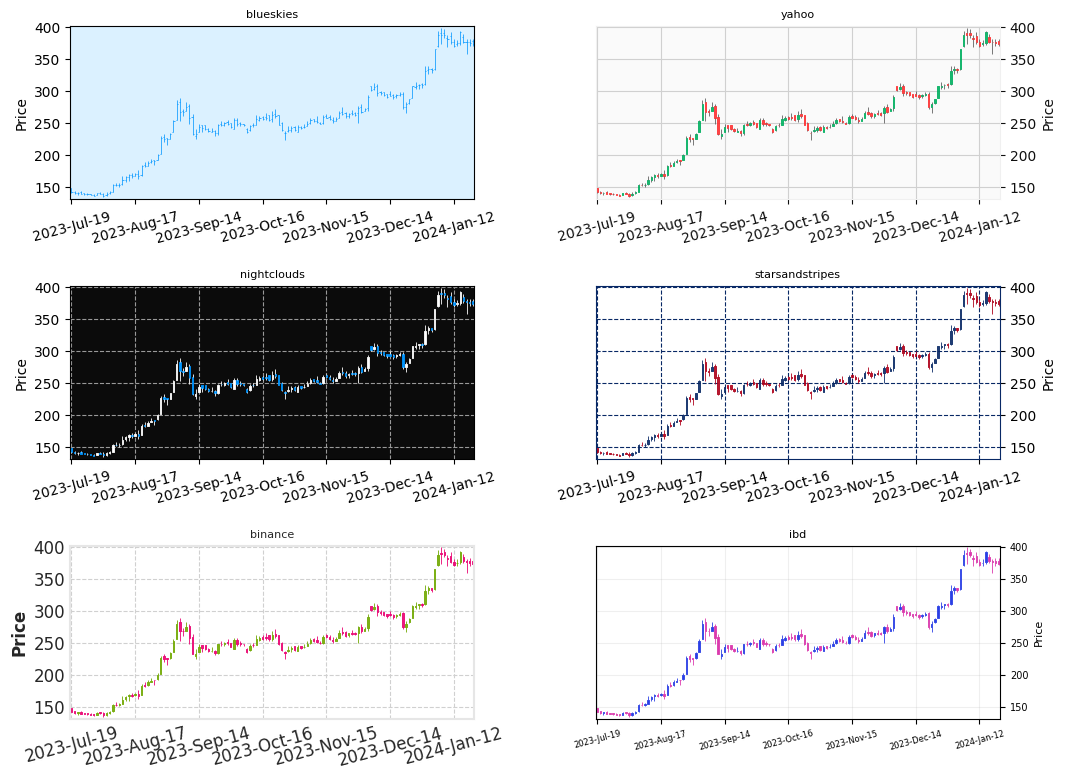

In [14]:
fig = mpf.figure(figsize=(12,9))
fig.subplots_adjust(hspace=.5, wspace=0.3)
ax1 = fig.add_subplot(3,2,1,style='blueskies')
ax2 = fig.add_subplot(3,2,2,style='yahoo')

s   = mpf.make_mpf_style(base_mpl_style='fast',base_mpf_style='nightclouds')
ax3 = fig.add_subplot(3,2,3,style=s)
ax4 = fig.add_subplot(3,2,4,style='starsandstripes')
ax5 = fig.add_subplot(3,2,5,style='binance')
ax6 = fig.add_subplot(3,2,6,style='ibd')

mpf.plot(df,ax=ax1,axtitle='blueskies',xrotation=15,tight_layout=True)
mpf.plot(df,type='candle',ax=ax2,axtitle='yahoo',xrotation=15,tight_layout=True)
mpf.plot(df,ax=ax3,type='candle',axtitle='nightclouds',xrotation=15,tight_layout=True)
mpf.plot(df,type='candle',ax=ax4,axtitle='starsandstripes',xrotation=15,tight_layout=True)
mpf.plot(df,type='candle',ax=ax5,axtitle='binance',xrotation=15,tight_layout=True)
mpf.plot(df,type='candle',ax=ax6,axtitle='ibd',xrotation=15,tight_layout=True)

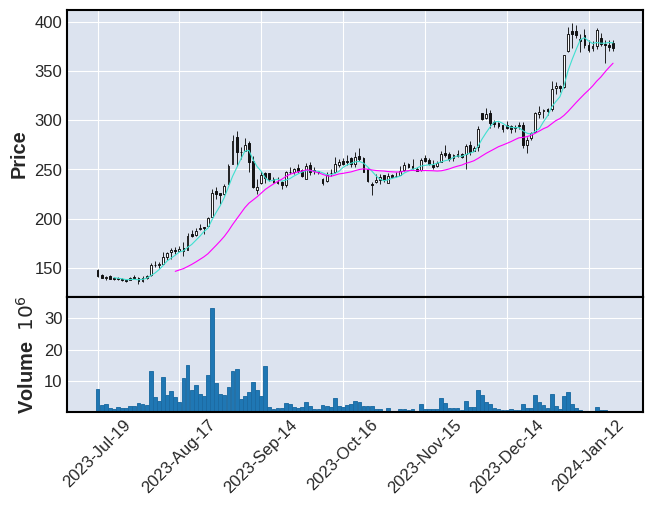

In [15]:
# Customization: figscale
mpf.plot(df, type='candle', mav=(5,20), volume=True)

KeyError: 'Unrecognized kwarg="rsi"'

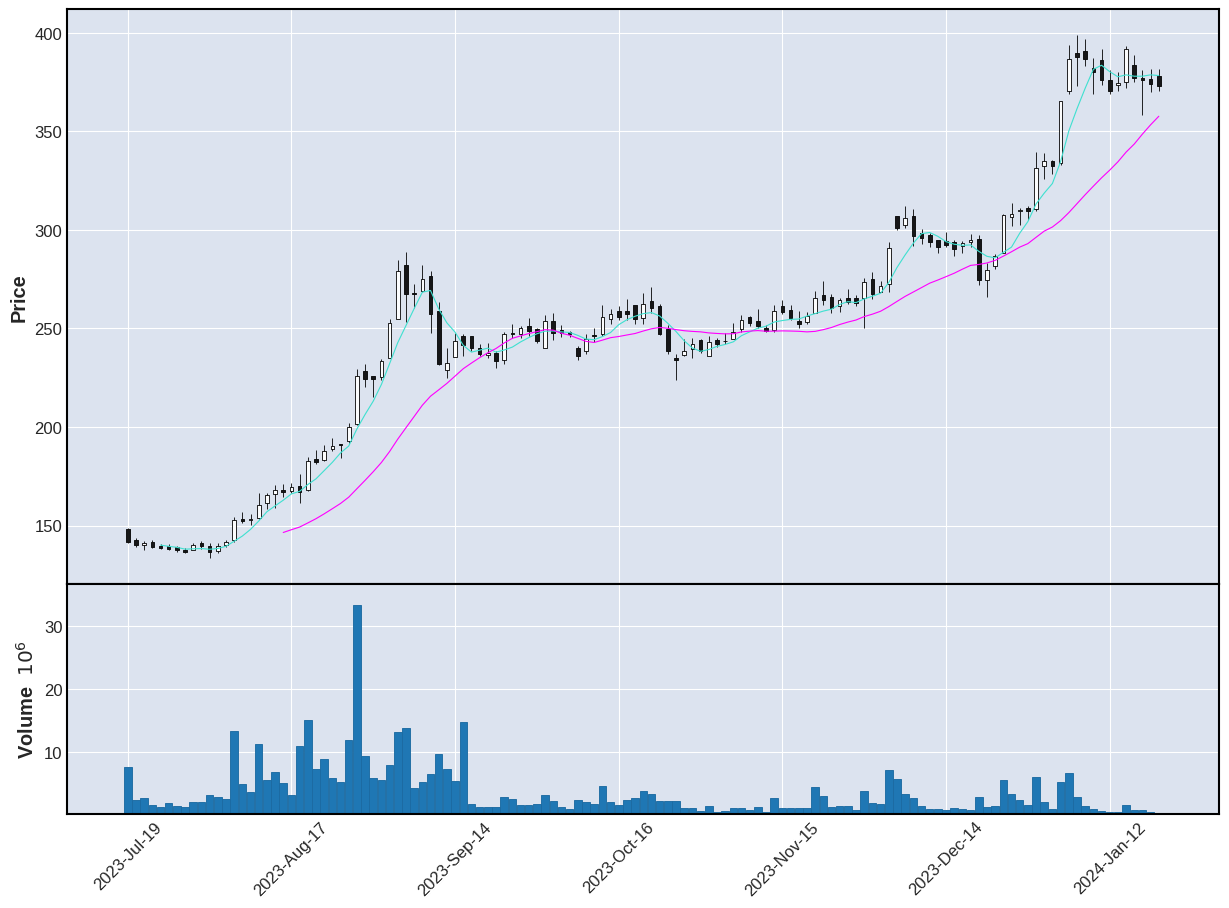

In [17]:
mpf.plot(df, type='candle', mav=(5,20), volume=True, figscale=2)


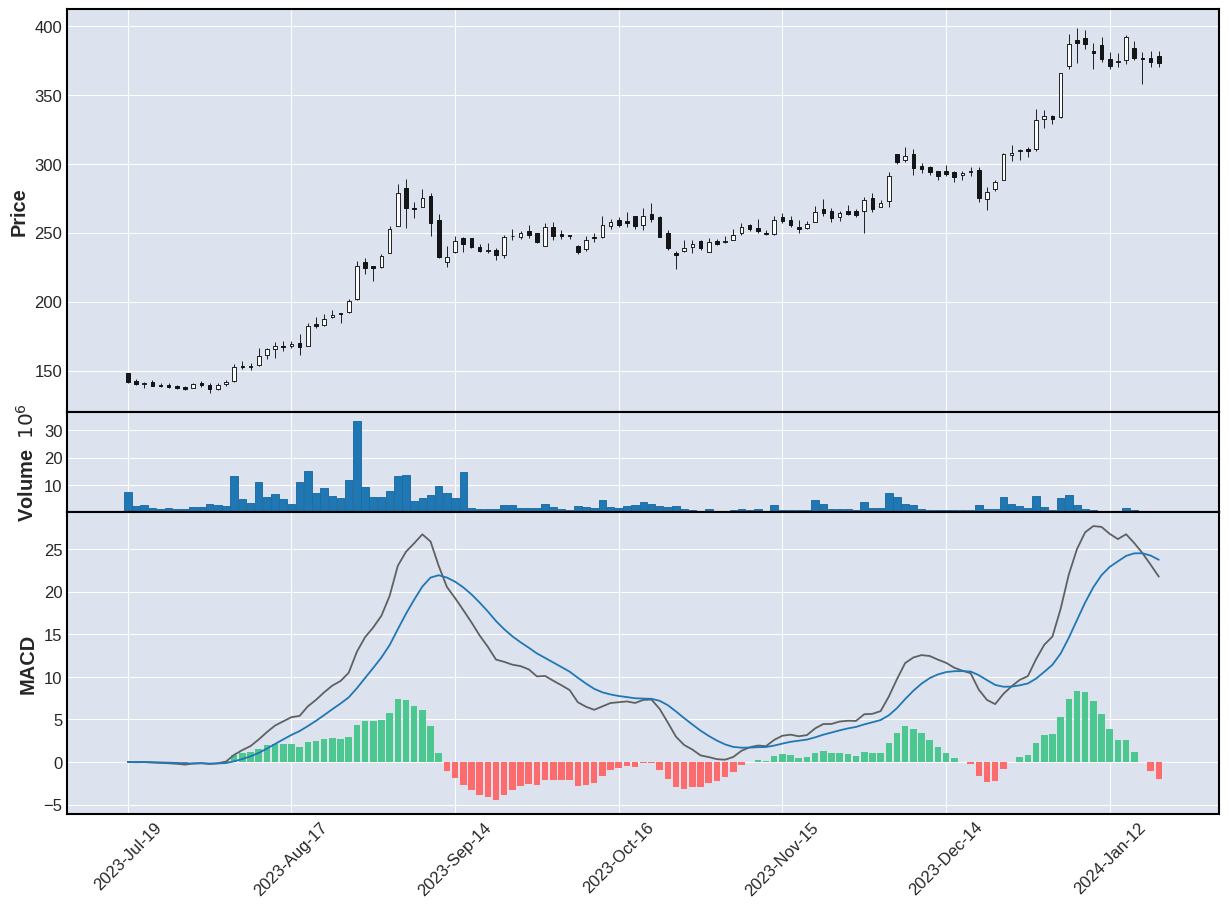

In [19]:
mpf.plot(df, type='candle', volume=True, addplot=macd_plot, panel_ratios=(4,1,3), figscale=2)


# Putting everything together

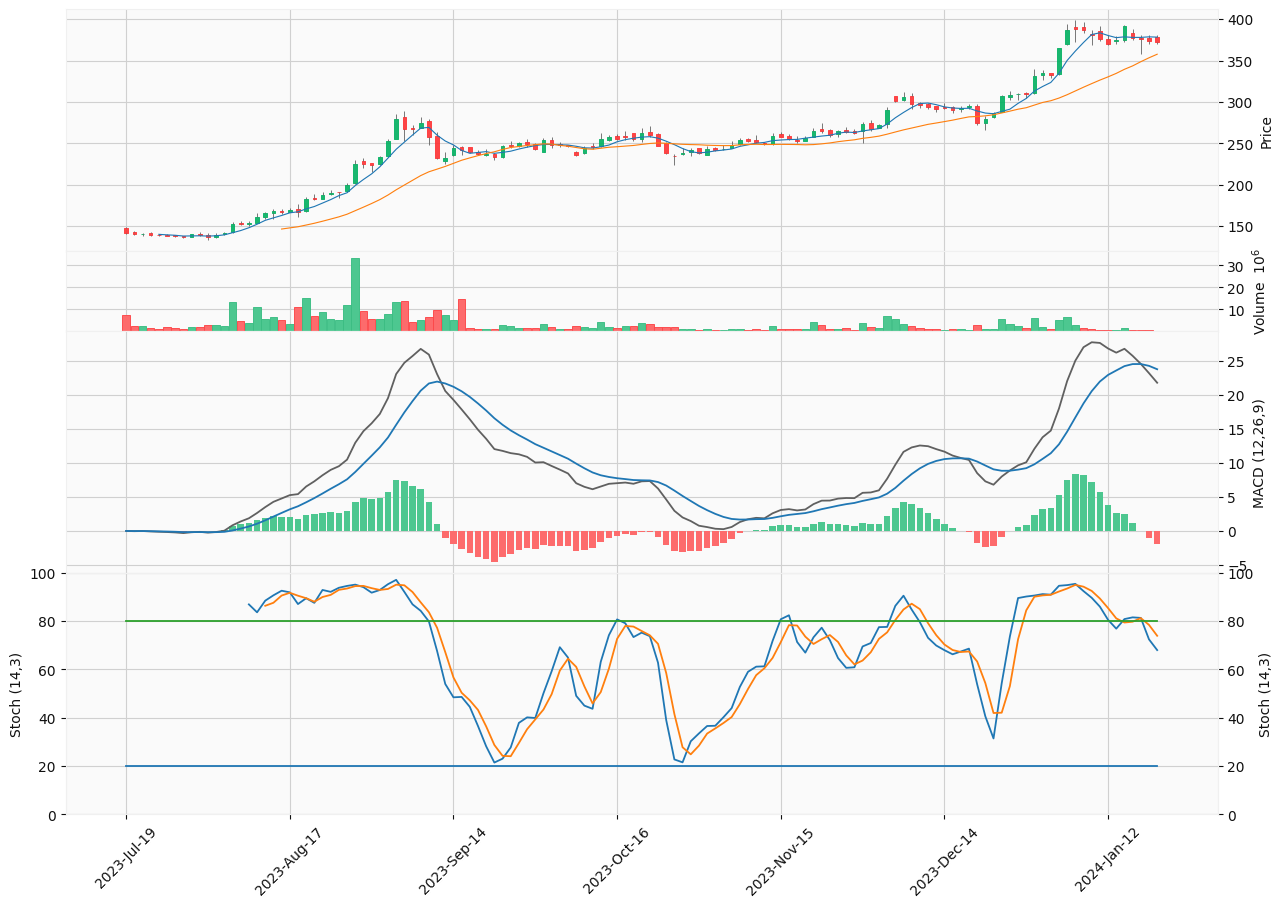

In [21]:
macd = MACD(df, 12, 26, 9)
stochastic = Stochastic(df, 14, 3)
plots  = [
    mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD (12,26,9)', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
    mpf.make_addplot((stochastic[['%D', '%SD', 'UL', 'DL']]),
                     ylim=[0, 100], panel=3, ylabel='Stoch (14,3)')
]
mpf.plot(df, type='candle', style='yahoo', mav=(5,20), volume=True, addplot=plots, panel_ratios=(3,1,3,3), figscale=2)

## RSI Indicator Using TA Library

In [24]:
import ta

df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()

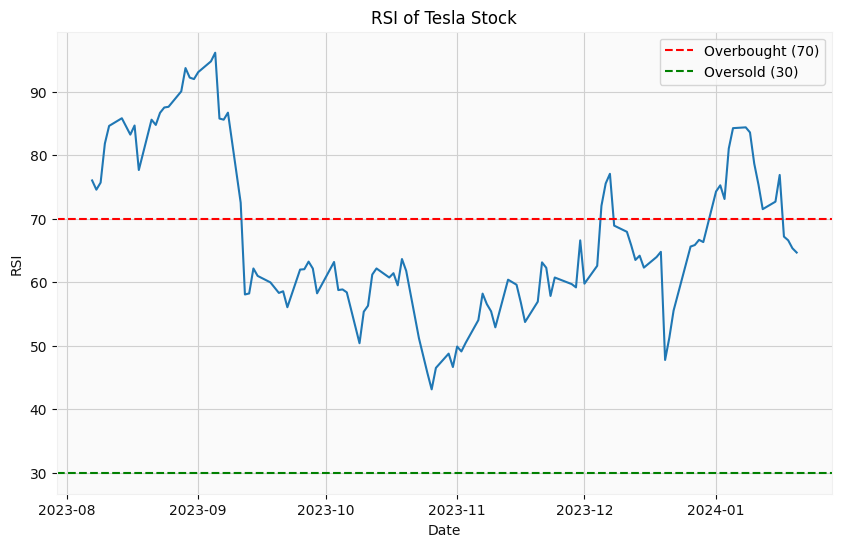

In [27]:
import matplotlib.pyplot as plt

upper_limit = 70
lower_limit = 30

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['RSI'])
plt.axhline(y=upper_limit, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=lower_limit, color='g', linestyle='--', label='Oversold (30)')
plt.title('RSI of Tesla Stock')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

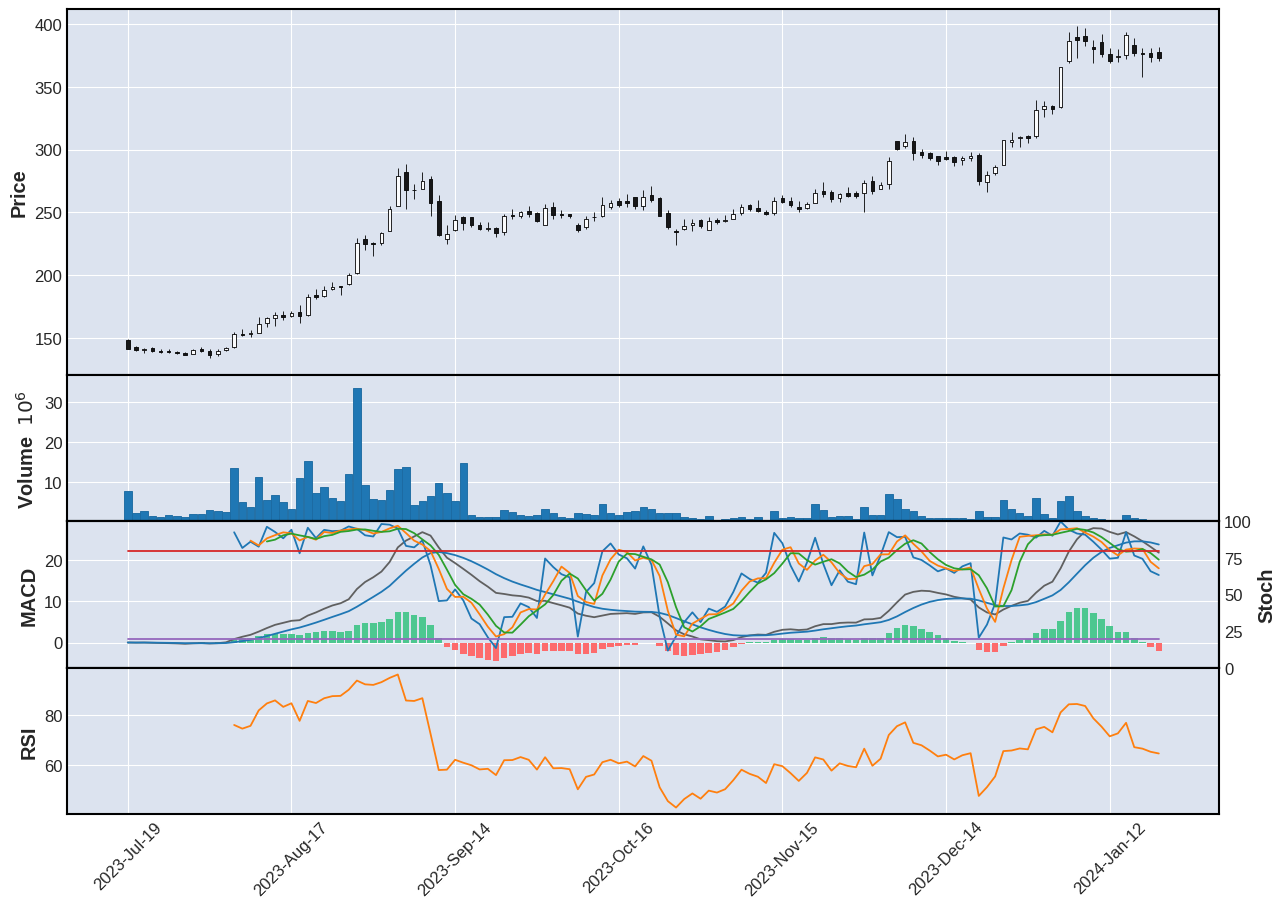

In [60]:
# Define the RSI function
def RSI(df, window=14, fillna=False):
    rsi = ta.momentum.rsi(df['Close'], window=window, fillna=fillna)
    return rsi

# Example usage:
df['RSI'] = RSI(df, window=14, fillna=False)

# Plotting RSI
rsi_plot = [
    mpf.make_addplot(df['RSI'], color='#ff7f0e', panel=3, ylabel='RSI', secondary_y=False),
]

# Combine both MACD and RSI plots
all_plots = macd_plot + rsi_plot + stochastic_plot

# Plot with all indicators
mpf.plot(df, type='candle', volume=True, addplot=all_plots, figscale=2)